# Importing libraries📚

In [1]:
import math
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Reading data📋

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

sample_sub = pd.read_csv('sample_submission.csv')

In [3]:
print(f'\nTrain shape: {train.shape}, \nTest shape: {test.shape}, \nSample shape: {sample_sub.shape}')


Train shape: (175296, 18), 
Test shape: (17520, 18), 
Sample shape: (17520, 3)


In [4]:
train.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


#### Missing values counts

In [5]:
train.isna().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
dtype: int64

In [6]:
test.isna().sum()

Year                      0
Month                     0
Day                       0
Hour                      0
Minute                    0
Cloud Type                0
Dew Point                 0
Temperature               0
Pressure                  0
Relative Humidity         0
Solar Zenith Angle        0
Precipitable Water        0
Wind Direction            0
Wind Speed                0
Fill Flag                 0
Clearsky DHI          17520
Clearsky DNI          17520
Clearsky GHI          17520
dtype: int64

✔NO MISSING DATA

In [7]:
train.describe()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
count,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000
mean,2013.500274,6.523549,15.727820,11.500000,15.000000,53.065426,330.065295,254.365490,2.540474,13.564431,18.266769,1003.185230,79.376366,89.729463,2.903732,188.877796,2.262871,0.740433
std,2.871908,3.448543,8.799349,6.922206,15.000043,64.201407,370.030821,327.705006,3.021879,8.196787,8.943096,5.935749,19.678235,40.085451,1.546979,99.014733,1.281902,6.575655
min,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.000000,-9.000000,970.000000,7.190000,8.550000,0.122000,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,12.000000,1000.000000,65.590000,56.450000,1.534000,97.400000,1.300000,0.000000
50%,2013.500000,7.000000,16.000000,11.500000,15.000000,0.000000,0.000000,0.000000,1.000000,15.000000,20.000000,1000.000000,84.230000,89.860000,2.866000,200.000000,2.000000,0.000000
75%,2016.000000,10.000000,23.000000,17.250000,30.000000,103.000000,736.000000,535.000000,6.000000,21.000000,25.000000,1010.000000,97.950000,123.060000,4.223000,272.000000,3.000000,0.000000
max,2018.000000,12.000000,31.000000,23.000000,30.000000,565.000000,1040.000000,1063.000000,10.000000,26.900000,40.000000,1024.000000,100.000000,171.550000,7.700000,360.000000,12.900000,100.000000


# EDA📈

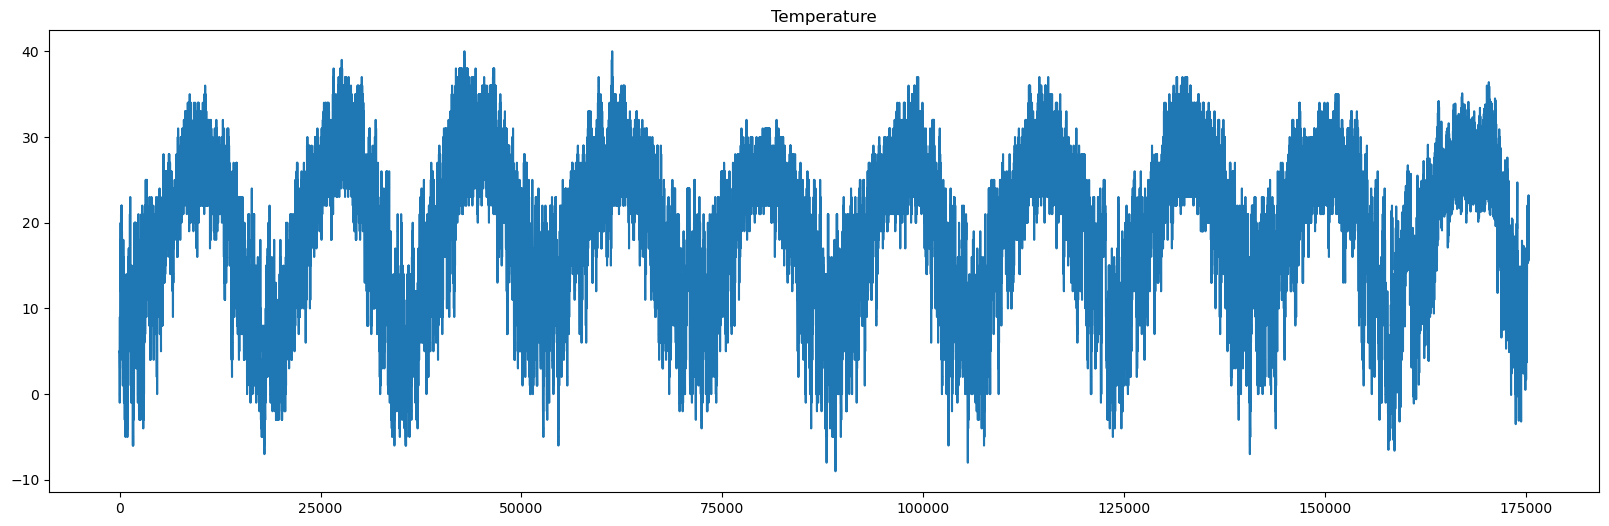

In [8]:
plt.figure(figsize=(20, 6))
plt.plot(train['Temperature'])
plt.title('Temperature')
plt.show()

✔ As expected there is a cyclic pattern

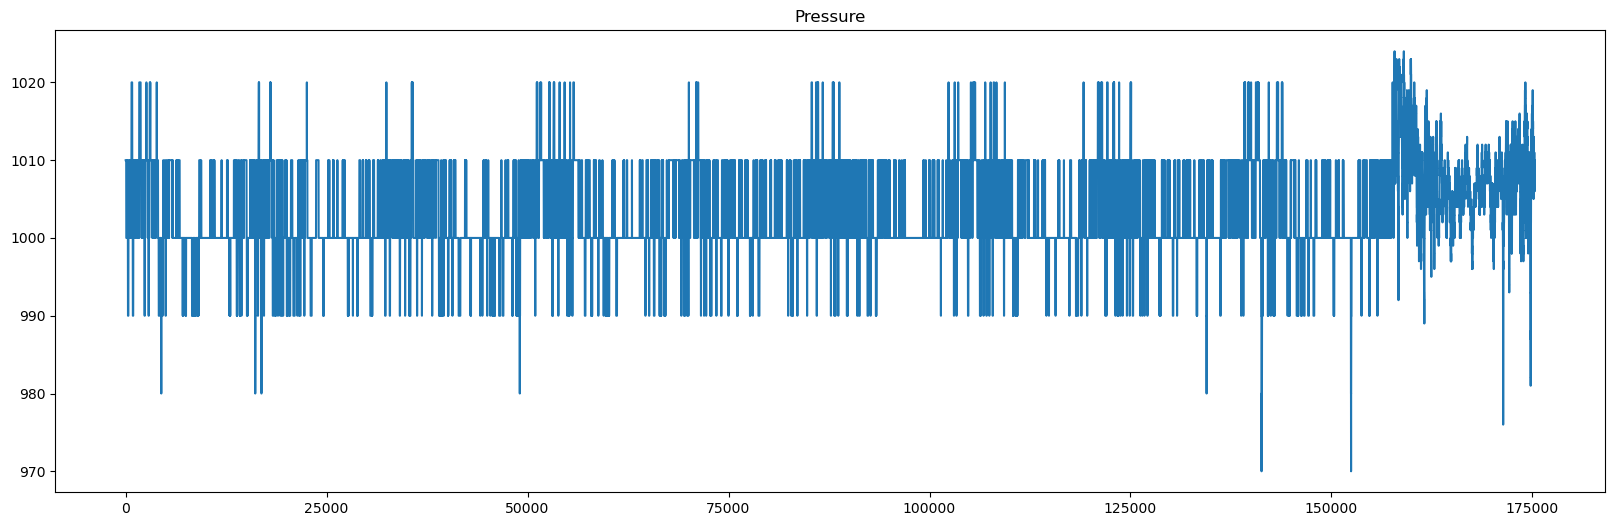

In [9]:
plt.figure(figsize=(20, 6))
plt.plot(train['Pressure'])
plt.title('Pressure')
plt.show()

✔ It seems that the organization installed more accurate pressure(analog) measurement device in 2018

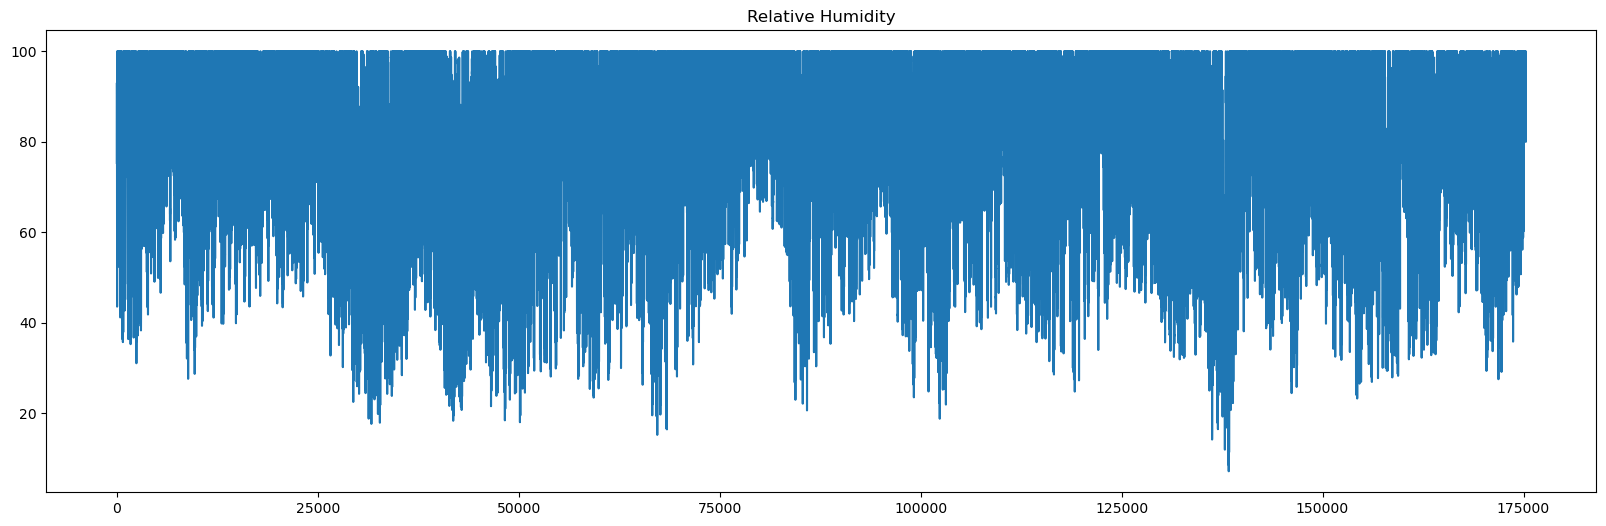

In [10]:
plt.figure(figsize=(20, 6))
plt.plot(train['Relative Humidity'])
plt.title('Relative Humidity')
plt.show()

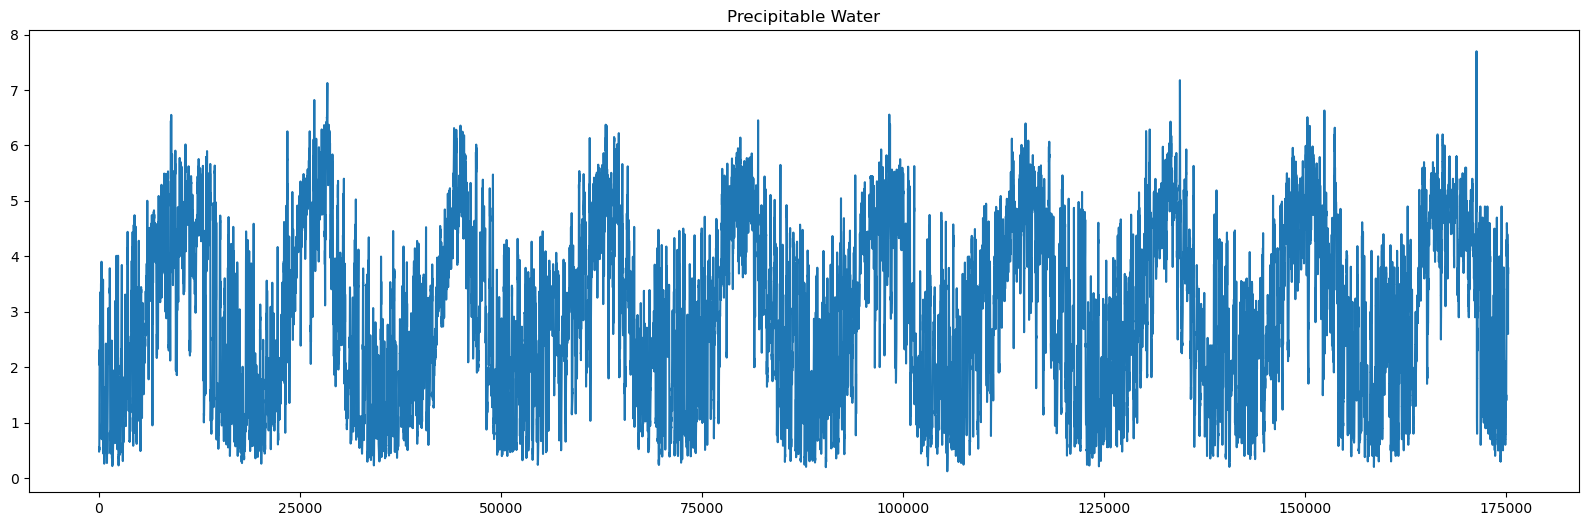

In [11]:
plt.figure(figsize=(20, 6))
plt.plot(train['Precipitable Water'])
plt.title('Precipitable Water')
plt.show()

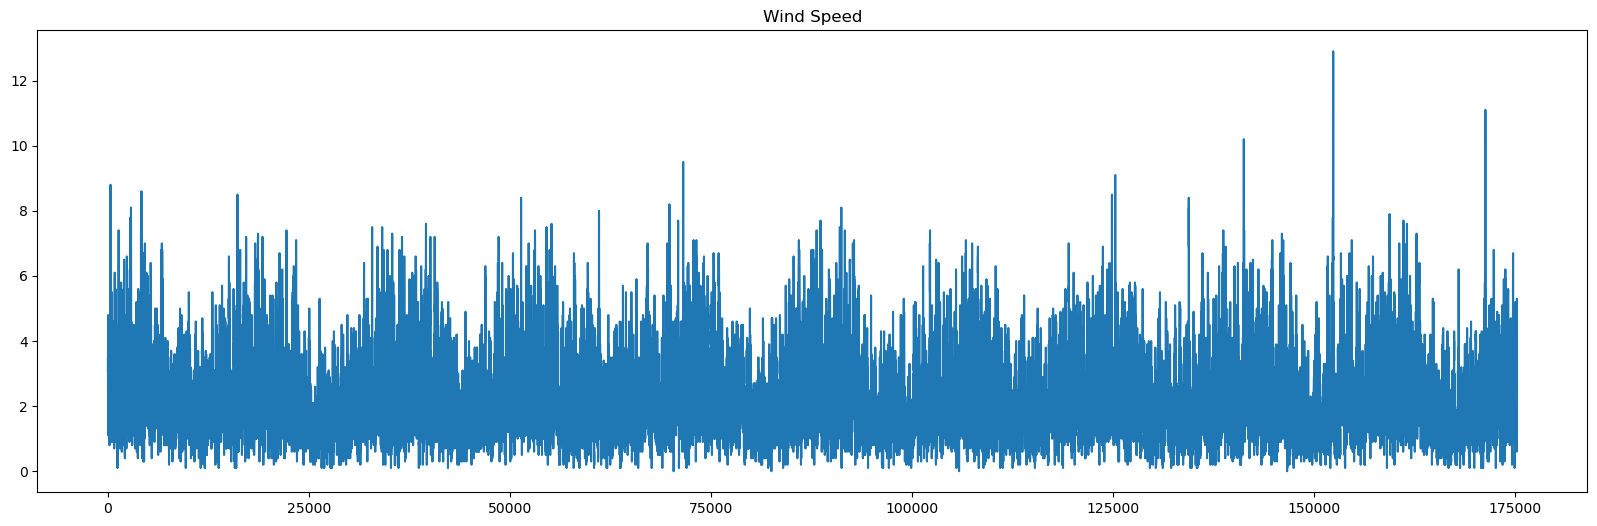

In [12]:
plt.figure(figsize=(20, 6))
plt.plot(train['Wind Speed'])
plt.title('Wind Speed')
plt.show()

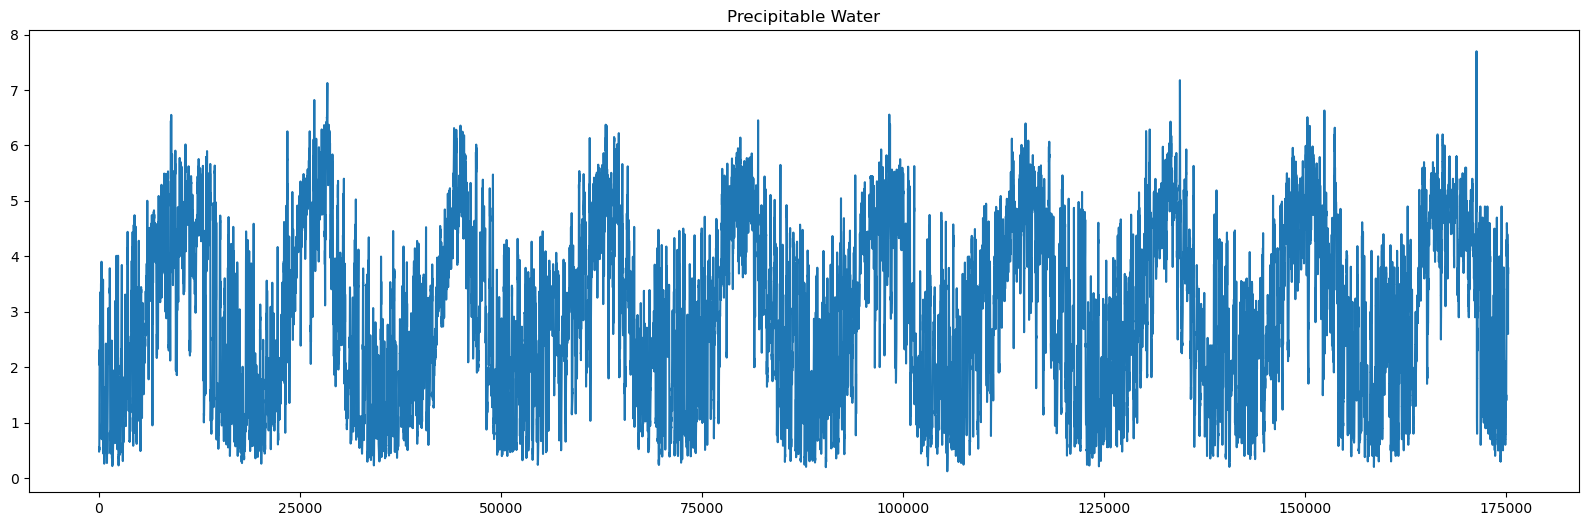

In [13]:
plt.figure(figsize=(20, 6))
plt.plot(train['Precipitable Water'])
plt.title('Precipitable Water')
plt.show()

✔Wind speed also has seasonality

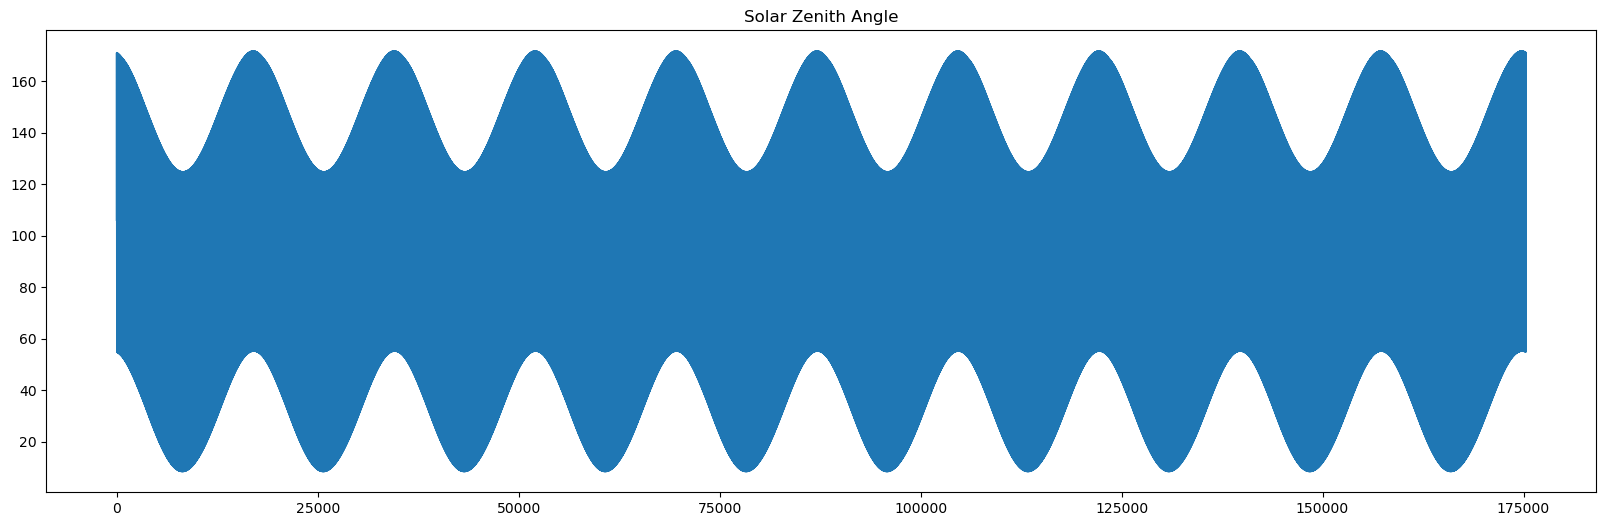

In [14]:
plt.figure(figsize=(20, 6))
plt.plot(train['Solar Zenith Angle'])
plt.title('Solar Zenith Angle')
plt.show()

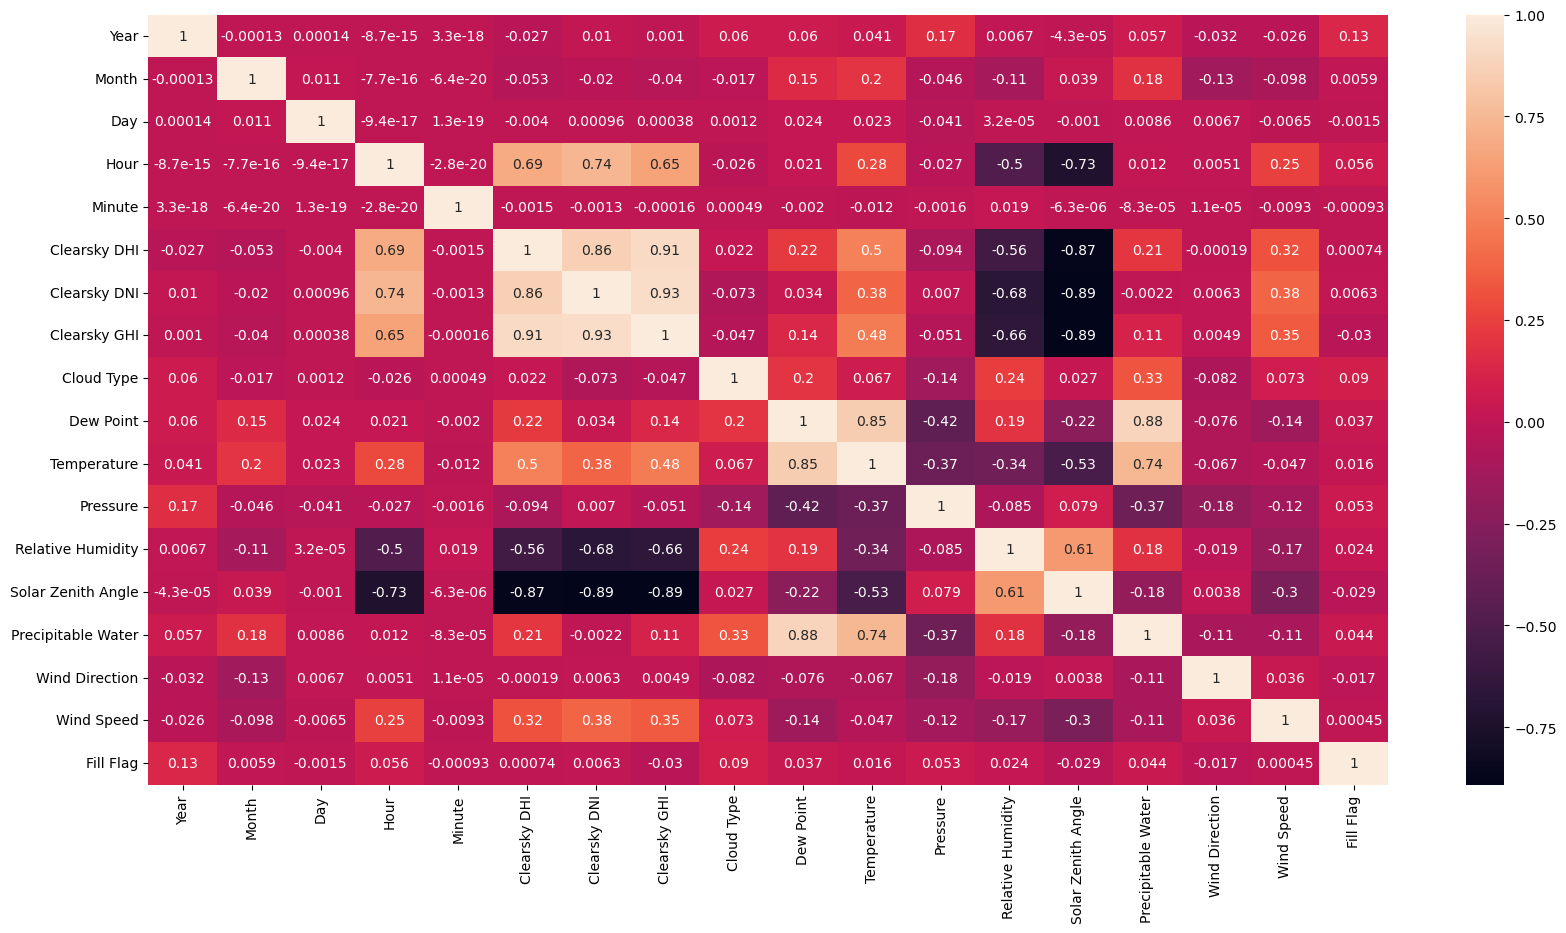

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(train.corr(), annot=True)
plt.show()

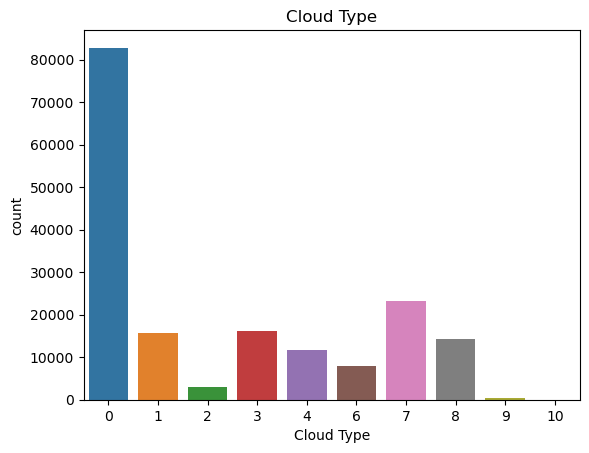

In [16]:
sns.countplot(train['Cloud Type'])
plt.title('Cloud Type')
plt.show()

✔Most of the time sky is clear

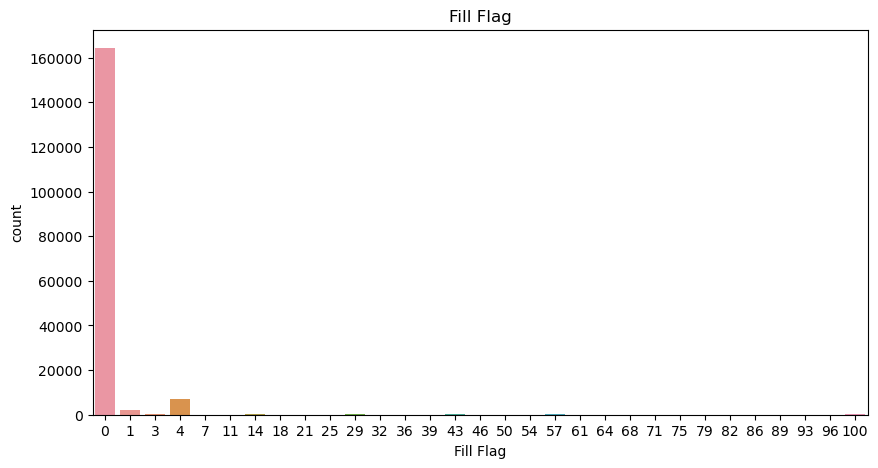

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(train['Fill Flag'])
plt.title('Fill Flag')
plt.show()

### Targets

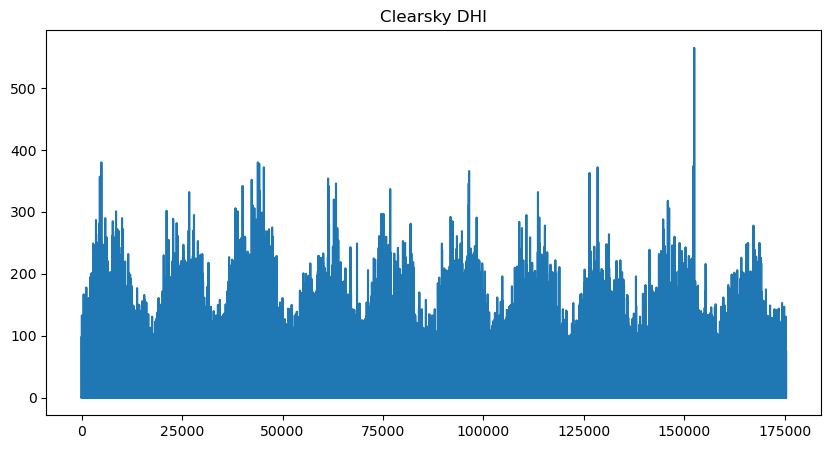

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(train['Clearsky DHI'])
plt.title('Clearsky DHI')
plt.show()

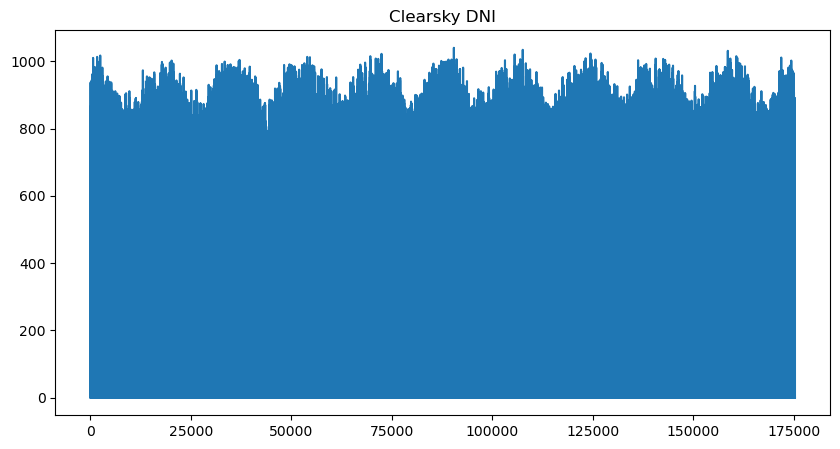

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(train['Clearsky DNI'])
plt.title('Clearsky DNI')
plt.show()

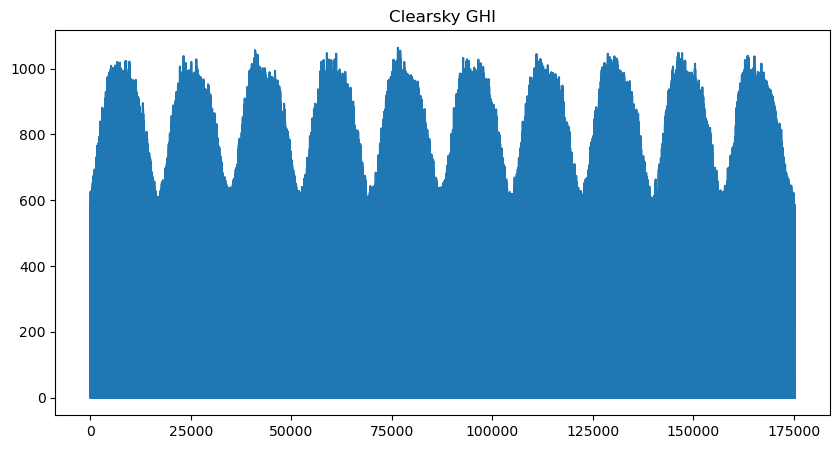

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(train['Clearsky GHI'])
plt.title('Clearsky GHI')
plt.show()

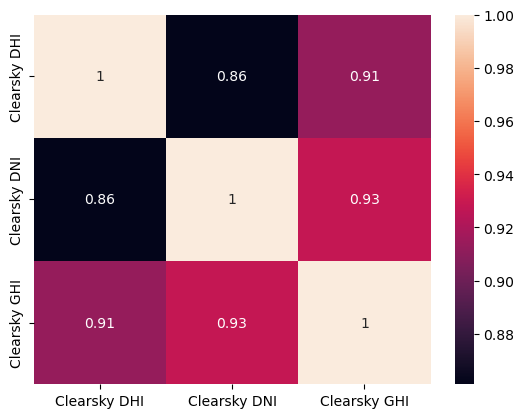

In [21]:
sns.heatmap(train[['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']].corr(), annot=True)
plt.show()

✔Target columns are correlated, so making individual model is not a good idea.

# Pre-Processing and FE🛠

In [22]:
def add_features(df):
    df['del_Dew Point'] = df['Dew Point'].diff().fillna(0)
    df['del_Temperature'] = df['Temperature'].diff().fillna(0)    
    df['del_Pressure'] = df['Pressure'].diff().fillna(0)    
    df['del_Relative Humidity'] = df['Relative Humidity'].diff().fillna(0)    
    df['del_Solar Zenith Angle'] = df['Solar Zenith Angle'].diff().fillna(0)    
    df['del_Precipitable Water'] = df['Precipitable Water'].diff().fillna(0)
    df['del_Wind Speed'] = df['Wind Speed'].diff().fillna(0)        
    df['del_Fill Flag'] = df['Fill Flag'].diff().fillna(0)
    
    return df

In [23]:
train = add_features(train)
test = add_features(test)


# Training🏋️‍♂️

In [24]:
X = train.drop(['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'], axis=1)
y = train[['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']]

In [25]:
cat_col = ['Cloud Type']
num_col = [col for col in X.columns if col not in cat_col]

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=3, shuffle=False)

X_test = test.drop(['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'], axis=1)

In [27]:
transform = ColumnTransformer(transformers=[
    ('one_hot', OneHotEncoder(), cat_col),
    ('pass', 'passthrough', num_col)
])

In [28]:
X_train = transform.fit_transform(X_train)
X_val = transform.transform(X_val)

X_test = transform.transform(X_test)

#### DHI

In [29]:
model_DHI = XGBRegressor(objective="reg:squarederror",learning_rate=0.01,max_depth=7, tree_method ='gpu_hist',
                         predictor = 'gpu_predictor', n_estimators=1000, reg_alpha=50, reg_lambda=70,
                         random_state=42, n_jobs=-1,)

In [30]:
model_DHI.fit(X_train, y_train.loc[:, 'Clearsky DHI'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, predictor='gpu_predictor', ...)

In [31]:
dhi_tr_preds = model_DHI.predict(X_train)

In [32]:
mean_squared_error(y_train.loc[:, 'Clearsky DHI'], dhi_tr_preds)

157.0675263769188

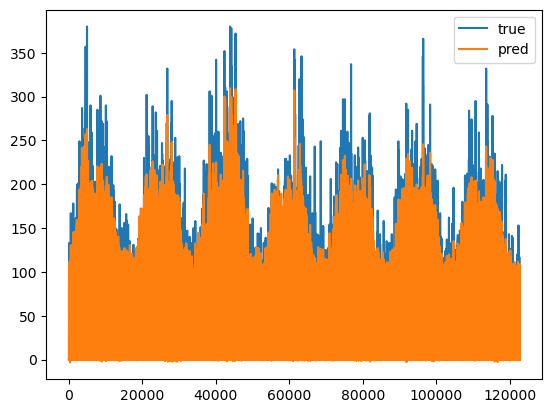

In [33]:
plt.plot(y_train.loc[:, 'Clearsky DHI'])
plt.plot(dhi_tr_preds)
plt.legend(['true', 'pred'])
plt.show()

In [34]:
dhi_val_preds = model_DHI.predict(X_val)

In [35]:
mean_squared_error(y_val.loc[:, 'Clearsky DHI'], dhi_val_preds)

240.07974382048937

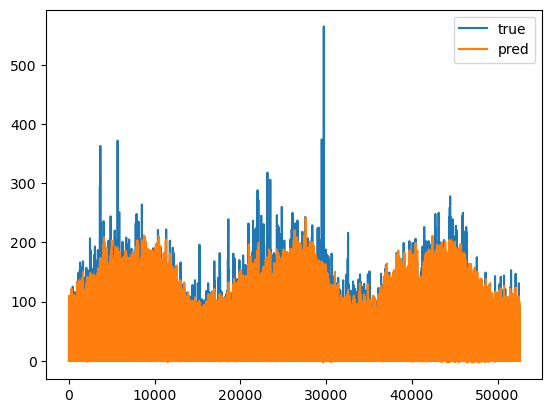

In [36]:
plt.plot(y_val.loc[:, 'Clearsky DHI'].reset_index(drop=True))
plt.plot(dhi_val_preds)
plt.legend(['true', 'pred'])
plt.show()

#### DNI

In [37]:
model_DNI = XGBRegressor(objective="reg:squarederror",learning_rate=0.01,max_depth=7, tree_method ='gpu_hist',
                         predictor = 'gpu_predictor', n_estimators=1000, reg_alpha=50, reg_lambda=70,
                         random_state=42, n_jobs=-1,)

In [38]:
model_DNI.fit(X_train, y_train.loc[:, 'Clearsky DNI'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, predictor='gpu_predictor', ...)

In [39]:
dni_tr_preds = model_DNI.predict(X_train)

In [40]:
mean_squared_error(y_train.loc[:, 'Clearsky DNI'], dni_tr_preds)

950.7812165117944

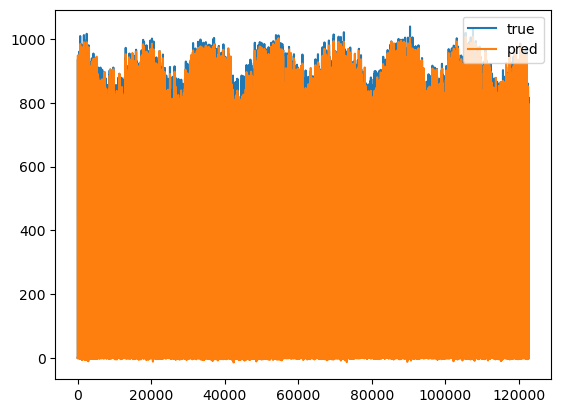

In [41]:
plt.plot(y_train.loc[:, 'Clearsky DNI'])
plt.plot(dni_tr_preds)
plt.legend(['true', 'pred'])
plt.show()

In [42]:
dni_val_preds = model_DNI.predict(X_val)

In [43]:
mean_squared_error(y_val.loc[:, 'Clearsky DNI'], dni_val_preds)

1429.6144928651188

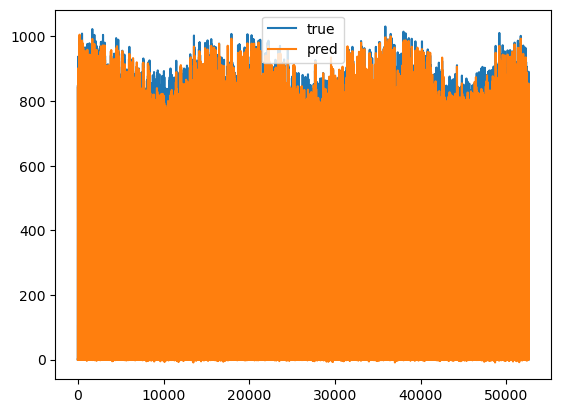

In [44]:
plt.plot(y_val.loc[:, 'Clearsky DNI'].reset_index(drop=True))
plt.plot(dni_val_preds)
plt.legend(['true', 'pred'])
plt.show()

#### GHI

In [45]:
model_GHI = XGBRegressor(objective="reg:squarederror", tree_method ='gpu_hist',
                         predictor = 'gpu_predictor', reg_alpha=50, reg_lambda=70,
                         random_state=42, n_jobs=-1,)

In [46]:
model_GHI.fit(X_train, y_train.loc[:, 'Clearsky GHI'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, predictor='gpu_predictor', ...)

In [47]:
ghi_tr_preds = model_GHI.predict(X_train)

In [48]:
mean_squared_error(y_train.loc[:, 'Clearsky GHI'], ghi_tr_preds)

29.51358893367763

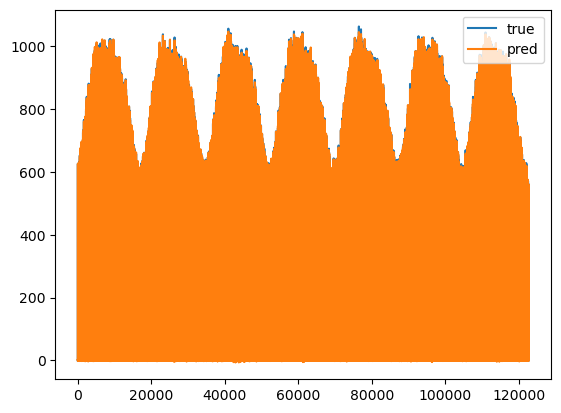

In [49]:
plt.plot(y_train.loc[:, 'Clearsky GHI'])
plt.plot(ghi_tr_preds)
plt.legend(['true', 'pred'])
plt.show()

In [50]:
ghi_val_preds = model_GHI.predict(X_val)

In [51]:
mean_squared_error(y_val.loc[:, 'Clearsky GHI'], ghi_val_preds)

48.82858028816857

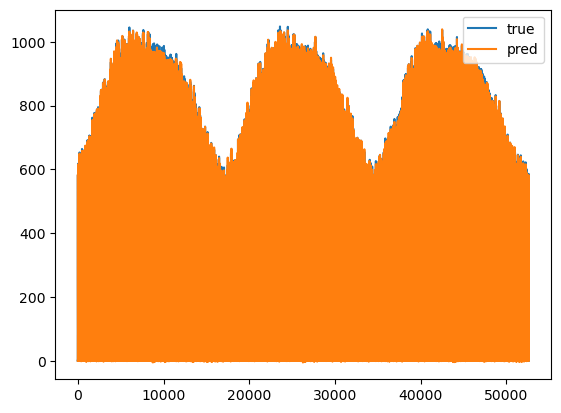

In [52]:
plt.plot(y_val.loc[:, 'Clearsky GHI'].reset_index(drop=True))
plt.plot(ghi_val_preds)
plt.legend(['true', 'pred'])
plt.show()

# Inference🛰

In [53]:
sample_sub.loc[:, 'Clearsky DHI'] = model_DHI.predict(X_test)
sample_sub.loc[:, 'Clearsky DNI'] = model_DNI.predict(X_test)
sample_sub.loc[:, 'Clearsky GHI'] = model_GHI.predict(X_test)

In [54]:
sample_sub.loc[sample_sub['Clearsky DHI'] < 0, 'Clearsky DHI'] = 0
sample_sub.loc[sample_sub['Clearsky DNI'] < 0, 'Clearsky DNI'] = 0
sample_sub.loc[sample_sub['Clearsky GHI'] < 0, 'Clearsky GHI'] = 0

In [55]:
sample_sub

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,0.000000,1.715759,0.342026
1,0.000000,1.790314,0.230408
2,0.000000,1.781219,0.249588
3,0.000000,1.783661,0.293472
4,0.000000,0.755707,0.419037
...,...,...,...
17515,47.380646,653.498291,185.105164
17516,35.656460,504.027802,101.230774
17517,11.601414,157.881058,17.234894
17518,0.112305,0.000000,0.424210


In [56]:
sample_sub.to_csv('submission.csv', index=None)